# Regressão linear com multiplas variáveis

A regressão linear com multiplas variáveis é um modelo de regressão que estima a relação entre várias variáveis independente e uma variável dependente através de uma função linear que prevê os valores da variável dependente como uma função das variáveis independentes.

## Biblioteca

Serão utilizadas as bibliotecas numpy para a realização de operações matemáticas em array e matrizes multidimensionais, pandas para a importação do dataset e matplotlib para plotagem de gráficos.

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importação dos dados

O dataset utilizado contém informações acerca de preço de venda de imóveis. A primeira coluna do dataset corresponde ao tamanho do imóvel em pés quadrados, a segunda coluna corresponde à quantidade de dormitórios no imóvel e a terceira coluna corresponde ao preço do imóvel. Ao longo do trabalho as duas primeiras colunas do dataset são definidas pela variável *X* e a terceira coluna é definida pela variável *y*.

In [81]:
data = pd.read_csv('data/ex1data2.txt', header=None)

In [82]:
data.head()

,0,1,2
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [83]:
data.describe()

,0,1,2
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


In [84]:
X = np.array(data.iloc[:, 0:-1])
y = np.array(data.iloc[:, -1])

## Normalização das características

Conforme pode ser observado na descrição dos dados da sessão anterior, os dados da primeira e da segunda coluna do dataset possuem grandezas diferentes, sendo os dados da primeira coluna aproximadamente 1000 vezes maiores que os dados da segunda coluna, portanto devemos normalizar as características do dataset para que possuam a mesma grandeza. Para isto, iremos utilizar o método *Z-Score* definido pela seguinte formula, onde $\mu$ é a média e $\sigma$ é o desvio padrão:

$$ g(x) = \frac{x - \mu}{\sigma} $$

In [89]:
mu = np.mean(X, axis=0)
sigma = np.std(X, axis=0)
X_norm = (X - mu) / sigma
m = len(y)
X_norm = np.append(np.ones([m, 1]), X_norm, axis=1)

## Gradiente Descendente

O gradiente descendente funciona de maneira semelhante ao apresentado anteriormente na regressão linear simples, no entanto como a regressão linear multipla temos mais de uma variável a função de hipótese deve contemplar todas as variáveis, sendo assim, a função de hipótese $h_\theta$ é definida da seguinte forma:

$$ h_\theta(x) = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \theta_3 x_3 + \cdots + \theta_n x_n $$

Como o número de variáveis pode mudar de acordo com o dataset, a função de hipótese pode ser reescrita de forma vetorizada utilizando matrizes:

$$ h_\theta(x) = \begin{bmatrix} \theta_0 & \theta_1 & \cdots & \theta_n \end{bmatrix} \begin{bmatrix} x_0 \\ x_1 \\ \vdots \\ x_n \end{bmatrix} = \theta^T x $$

A função de custo é a mesma definida anteriormente na regressão linear simples:

$$ J(\theta_0, \theta_1) = \frac{1}{2m}\sum_{i=1}^{m}\left(h_\theta(x_i) - y_i\right)^2 $$

Podemos reutilizar o mesmo código utilizado na regressão linear simples pois já foi escrito de forma vetorizada.

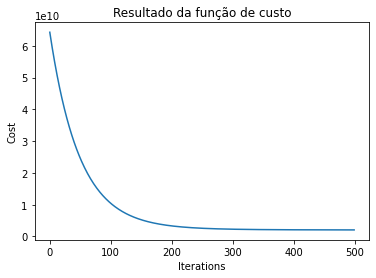

Parâmetros theta: [ 3.38175984e+05  1.03032124e+05 -2.02325233e+02]
Custo: 2063782403.6748846


In [93]:
def compute_cost(X, y, theta):
    return np.sum((X @ theta - y) ** 2) / (2 * m)

def gradient_descent(X, y, theta, alpha, epochs):
    cost = np.zeros(epochs)
    for i in range(epochs):
        h = X @ theta
        theta = theta - alpha * (X.T @ (h - y)) / m
        cost[i] = compute_cost(X, y, theta)
    return cost, theta

theta = np.zeros(3)
cost, fit_theta = gradient_descent(X_norm, y, theta, 0.01, 500)

plt.plot(cost)
plt.title('Resultado da função de custo')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

print(f'Parâmetros theta: {fit_theta}')
print(f'Custo: {cost[-1]}')